In [1]:
import pandas as pd
import seaborn as sns
from PIL import Image
from urllib.request import urlopen
import io
%matplotlib inline

In [2]:
originalFile = 'pornhub.com-db.csv'

Shrink large dataset

In [3]:
# originalDataset = pd.read_csv(originalFile, chunksize=100000, iterator=True, on_bad_lines='skip')
# for idx, chunk in enumerate(originalDataset):
    # chunk.to_csv(f'pornhub.com-db-shrinked{idx}-0.csv', mode='a', header=False, index=False) 

In [4]:
columns = ['embed','thumbnail','thumbnail2','title','tags','categories','pornstars','duration','views','likes','dislikes','thumbnail3','thumbnail4']

In [5]:
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0.csv', delimiter='|', on_bad_lines='skip')
# dataset.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', mode='a', header=False, index=False)

Data cleaning & processing

In [6]:
# from collections import Counter
# count = Counter()
# for i in range(len(dataset)):
#     count[len(dataset.iloc[i].embed.split('|'))] += 1
# count

In [7]:
# datasetValidation = [len(dataset.iloc[i].embed.split('|')) == 13 for i in range(len(dataset))]
# dataset = dataset[datasetValidation]

In [8]:
# datasetFixed = pd.DataFrame([dataset.iloc[i].embed.split('|') for i in range(1, len(dataset))], columns=dataset.iloc[0].embed.split('|'))

In [9]:
# datasetFixed.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', index=False, header=True, sep='|')

Data quality check

In [10]:
dataset = pd.read_csv(originalFile, delimiter='|', on_bad_lines='skip', header=None)
dataset.columns = columns
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0-fixed.csv', delimiter='|', on_bad_lines='skip')
len(dataset)

3564203

In [11]:
dataset.value_counts();

In [12]:
# dataset.columns = columns

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564203 entries, 0 to 3564202
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   embed       object 
 1   thumbnail   object 
 2   thumbnail2  object 
 3   title       object 
 4   tags        object 
 5   categories  object 
 6   pornstars   object 
 7   duration    int64  
 8   views       int64  
 9   likes       float64
 10  dislikes    float64
 11  thumbnail3  object 
 12  thumbnail4  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 353.5+ MB


In [14]:
def convertStringDelimiterToList(Row):
    try:
        Row['pornstars']=  Row['pornstars'].split(';')
        Row['tags']=  Row['tags'].split(';')
        Row['categories']=  Row['categories'].split(';')
        return Row
    except AttributeError:
        print(Row)
        raise AttributeError

In [15]:
dropNAN = dataset.dropna(subset=['pornstars', 'tags', 'categories'])

In [16]:
processedDataset = dropNAN.apply(convertStringDelimiterToList, axis=1)

In [17]:
dataset.head()

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
0,"<iframe src=""https://www.pornhub.com/embed/f4c...",https://ci.phncdn.com/videos/200708/12/347/ori...,https://ci.phncdn.com/videos/200708/12/347/ori...,Heather brooke swallo from condom,ideepthroat.com;pornstar;swallow;blowjob;fetis...,Blowjob;Pornstar;Verified Models,Heather Harmon,99,2641964,3134.0,478.0,https://ci.phncdn.com/videos/200708/12/347/ori...,https://ci.phncdn.com/videos/200708/12/347/ori...
1,"<iframe src=""https://www.pornhub.com/embed/3ee...",https://ci.phncdn.com/videos/200705/06/417/ori...,https://ci.phncdn.com/videos/200705/06/417/ori...,HEATHER IN CHRISTMAS,ideepthroat.com;fetish;blowjob;blonde;swallow;...,Blowjob;Fetish;Pornstar;Verified Models,Heather Harmon,126,992962,1783.0,277.0,https://ci.phncdn.com/videos/200705/06/417/ori...,https://ci.phncdn.com/videos/200705/06/417/ori...
2,"<iframe src=""https://www.pornhub.com/embed/e5e...",https://ci.phncdn.com/videos/200704/18/518/ori...,https://ci.phncdn.com/videos/200704/18/518/ori...,Blowjob Instruction,ideepthroat.com;blowjob;pornstar;blonde;big-di...,Orgy;Blonde;Blowjob;Pornstar;Threesome;Verifie...,Heather Harmon,86,838612,722.0,128.0,https://ci.phncdn.com/videos/200704/18/518/ori...,https://ci.phncdn.com/videos/200704/18/518/ori...
3,"<iframe src=""https://www.pornhub.com/embed/f8e...",https://ci.phncdn.com/videos/200706/05/592/ori...,https://ci.phncdn.com/videos/200706/05/592/ori...,heather brooke-talks dirty,ideepthroat.com;blowjob;blonde;big-dick;big-ti...,Blowjob;Pornstar;Verified Models,Heather Harmon,110,3439411,3554.0,461.0,https://ci.phncdn.com/videos/200706/05/592/ori...,https://ci.phncdn.com/videos/200706/05/592/ori...
4,"<iframe src=""https://www.pornhub.com/embed/493...",https://ci.phncdn.com/videos/201010/27/6401/or...,https://ci.phncdn.com/videos/201010/27/6401/or...,Hot blonde doing the Laundry,hot;blonde;laundry;anal;fuck;blowjob;cumshot;i...,Blonde;Pornstar;Anal;Verified Models,Heather Harmon,153,157163,145.0,33.0,https://ci.phncdn.com/videos/201010/27/6401/or...,https://ci.phncdn.com/videos/201010/27/6401/or...


In [18]:
dataset.describe()

,duration,views,likes,dislikes
count,3.564203e+06,3.564203e+06,3.197341e+06,3.197341e+06
mean,5.200794e+02,7.521785e+04,2.643887e+02,6.040635e+01
std,6.945195e+02,6.658683e+05,2.112865e+03,7.233438e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.800000e+01,3.440000e+02,5.000000e+00,0.000000e+00
50%,3.230000e+02,2.265000e+03,2.100000e+01,2.000000e+00
75%,6.720000e+02,1.920600e+04,9.300000e+01,1.400000e+01
max,1.033800e+05,2.256240e+08,6.637180e+05,2.726190e+05


The most viewed porn

In [19]:
mostViewed = dataset[dataset['likes'] == dataset['likes'].max()]
mostViewed

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
496504,"<iframe src=""https://www.pornhub.com/embed/ph5...",https://ci.phncdn.com/videos/201802/10/1541312...,https://ci.phncdn.com/videos/201802/10/1541312...,Playing a Game With Hot Step Sister - Anastasi...,point-of-view;step-fuck;hot;blonde;babe;fetish...,Amateur;Babe;Blonde;Creampie;Pornstar;Teen (18...,Alex Adams;Anastasia Knight;Johnny Sins;Lexi L...,1730,169292303,663718.0,205396.0,https://ci.phncdn.com/videos/201802/10/1541312...,https://ci.phncdn.com/videos/201802/10/1541312...


Thumbnail of most viewed porn

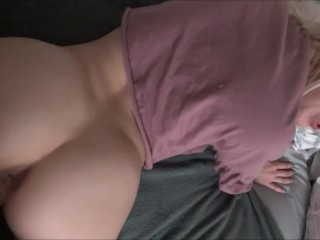

In [20]:
resp = urlopen(mostViewed['thumbnail'].values[0]).read()
Image.open(io.BytesIO(resp))

The most liked porn

In [21]:
dataset[dataset['likes'] == dataset['likes'].max()]

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
496504,"<iframe src=""https://www.pornhub.com/embed/ph5...",https://ci.phncdn.com/videos/201802/10/1541312...,https://ci.phncdn.com/videos/201802/10/1541312...,Playing a Game With Hot Step Sister - Anastasi...,point-of-view;step-fuck;hot;blonde;babe;fetish...,Amateur;Babe;Blonde;Creampie;Pornstar;Teen (18...,Alex Adams;Anastasia Knight;Johnny Sins;Lexi L...,1730,169292303,663718.0,205396.0,https://ci.phncdn.com/videos/201802/10/1541312...,https://ci.phncdn.com/videos/201802/10/1541312...


The most disliked porn

In [22]:
dataset[dataset['likes'] == dataset['likes'].max()]

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
496504,"<iframe src=""https://www.pornhub.com/embed/ph5...",https://ci.phncdn.com/videos/201802/10/1541312...,https://ci.phncdn.com/videos/201802/10/1541312...,Playing a Game With Hot Step Sister - Anastasi...,point-of-view;step-fuck;hot;blonde;babe;fetish...,Amateur;Babe;Blonde;Creampie;Pornstar;Teen (18...,Alex Adams;Anastasia Knight;Johnny Sins;Lexi L...,1730,169292303,663718.0,205396.0,https://ci.phncdn.com/videos/201802/10/1541312...,https://ci.phncdn.com/videos/201802/10/1541312...


Linear Relationship between each variable

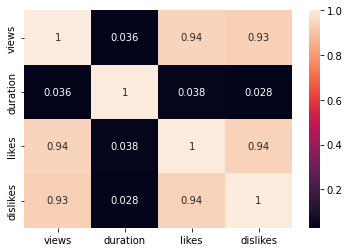

In [23]:
sns.heatmap(dataset[['views', 'duration', 'likes', 'dislikes']].corr(), annot=True);

Number of pornstars in the dataset

In [24]:
numVideoShotByPornstar = processedDataset.explode('pornstars')['pornstars']
numPornstars = len(numVideoShotByPornstar.unique())
f"There are {numPornstars} number of pornstars in the dataset"

'There are 17914 number of pornstars in the dataset'

Top 10 pornstars who shot the most porn

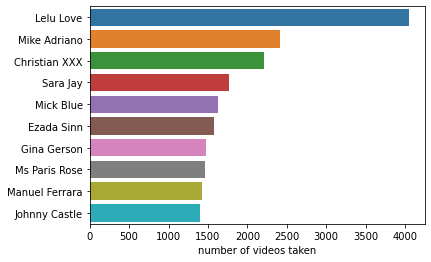

In [25]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).head(10)
nVideoByPornstar.columns = ['number of videos taken']
sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index);

Top 10 pornstars who shot the least porn

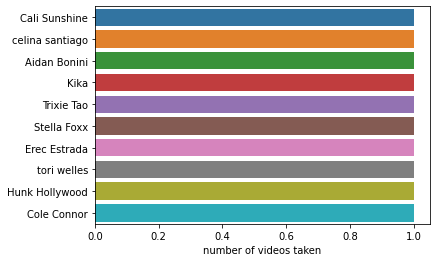

In [26]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).tail(10)
nVideoByPornstar.columns = ['number of videos taken']
sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index);

Top 10 Cumulative Porn Views By Pornstar (Top 10 Total Porn Views By Pornstar)

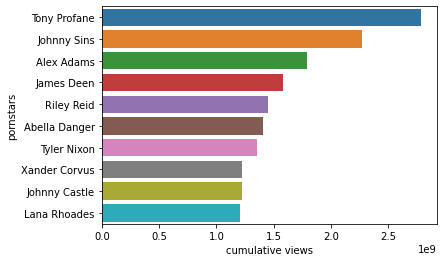

In [27]:
pornstarByVideoViews = processedDataset.explode('pornstars').groupby('pornstars')['views'].sum()
top10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).head(10)
top10PornstarByVideoViews.columns = ['cumulative views']
sns.barplot(x=top10PornstarByVideoViews['cumulative views'], y=top10PornstarByVideoViews.index);

Top 10 Lowest Cumulative Porn Views By Pornstar (Least 10 Total Porn Views By Pornstar)

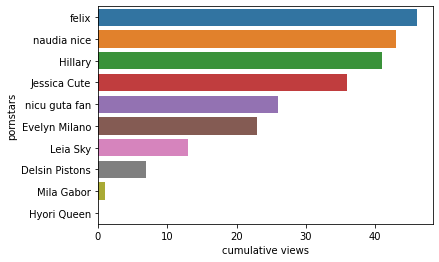

In [28]:
least10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).tail(10)
least10PornstarByVideoViews.columns = ['cumulative views']
sns.barplot(x=least10PornstarByVideoViews['cumulative views'], y=least10PornstarByVideoViews.index);

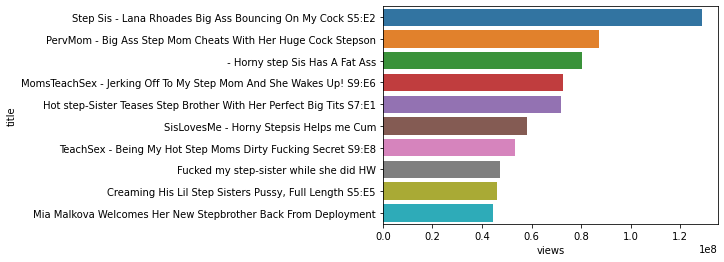

In [29]:
mostPopularPornstar = top10PornstarByVideoViews.index[0]
filterPornstar = processedDataset.apply(lambda x: True if mostPopularPornstar in x['pornstars'] else False, axis=1)
filterPornstar = processedDataset[filterPornstar]
sortedFilterPornstar = filterPornstar.sort_values(by='views', ascending=False).head(10)
sns.barplot(x=sortedFilterPornstar['views'], y=sortedFilterPornstar['title']);

Average Porn Views of Top 10 Popular Pornstar

In [30]:
def matchMoreThanOnePornstar(firstList, secondList):
    for pornstar in firstList:
        if pornstar in secondList:
            return True
    return False

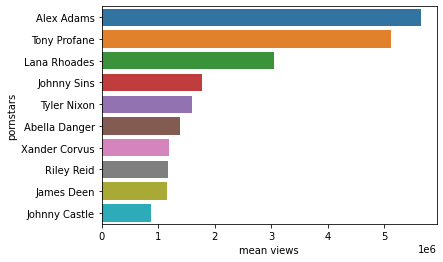

In [36]:
top10PopularPornstar = top10PornstarByVideoViews.index
explodedDataset = processedDataset.explode('pornstars')
filterTop10PopularPornstar = explodedDataset.apply(lambda x: 
                                                        True if matchMoreThanOnePornstar(top10PopularPornstar, x['pornstars']) else False, axis=1)
filterTop10PopularPornstar = explodedDataset[filterTop10PopularPornstar].groupby('pornstars')['views'].mean()
meanViewsOfTop10PopularPornstar = pd.DataFrame(filterTop10PopularPornstar)
meanViewsOfTop10PopularPornstar.columns = ['mean views']
meanViewsOfTop10PopularPornstar = meanViewsOfTop10PopularPornstar.sort_values(by='mean views',ascending=False)
sns.barplot(x=meanViewsOfTop10PopularPornstar['mean views'], y=meanViewsOfTop10PopularPornstar.index);

Number of Porn Tags In The Dataset

In [37]:
dropNoTagVideo = dataset.dropna(subset=['tags'])
splitTagsFromVideo=dropNoTagVideo['tags'].map(lambda x: x.split(';'))
PopularPornTagUploads = splitTagsFromVideo.explode('tags')
numPornTags = len(PopularPornTagUploads.unique())
f"number of Porn tags are {numPornTags}"

'number of Porn tags are 897952'

Top 10 Popular Porn Tag Uploads

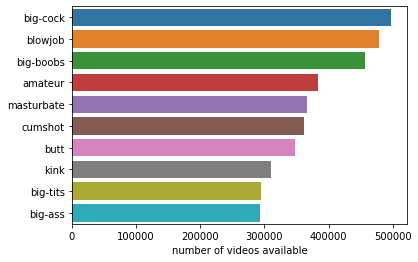

In [38]:
nTopVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).head(10)
nTopVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nTopVideoUploadsByTags['number of videos available'], y=nTopVideoUploadsByTags.index);

Least 10 Porn Tag Uploads

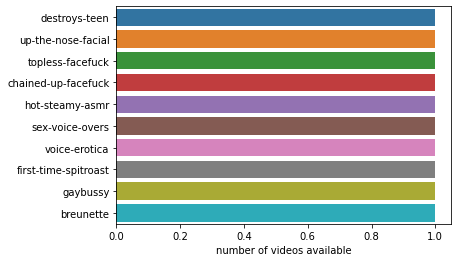

In [39]:
nLowestVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).tail(10)
nLowestVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nLowestVideoUploadsByTags['number of videos available'], y=nLowestVideoUploadsByTags.index);

Top 10 Cumulative Porn Views By Tags (Top 10 Total Porn Views By Tags)

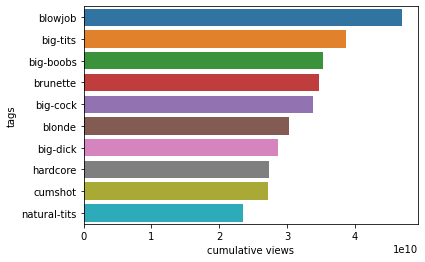

In [43]:
tagsByTopVideoCumulativeViews = processedDataset.explode('tags').groupby('tags')['views'].sum()
top10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).head(10)
top10tagsByCumulativeVideoViews.columns = ['cumulative views']
sns.barplot(x=top10tagsByCumulativeVideoViews['cumulative views'], y=top10tagsByCumulativeVideoViews.index);

10 Lowest Cumulative Porn Views By Tags (Least 10 Total Porn Views By Tags)

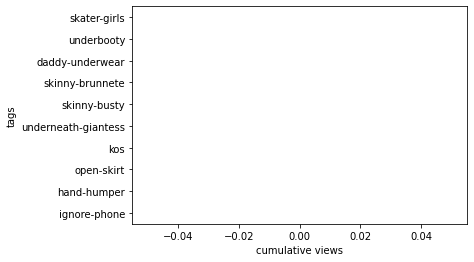

In [44]:
least10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).tail(10)
least10tagsByCumulativeVideoViews.columns = ['cumulative views']
sns.barplot(x=least10tagsByCumulativeVideoViews['cumulative views'], y=least10tagsByCumulativeVideoViews.index);